# TOPIC MODELING (3/26/24)

## Import libraries and load dataset

In [1]:

# Loading data set using pandas.
import pandas as pd

file= "ted_main.csv"
df = pd.read_csv(file)
df.head(5)

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

## Adding a new column named 'year' from "published_date" column

In [2]:
import datetime
import pandas as pd

# function to extract year from timestamps
def extract_year(timestamp):
    dt_object = datetime.datetime.utcfromtimestamp(timestamp)
    return dt_object.year

# Apply the custom function to the timestamp column
df['year'] = df['published_date'].apply(extract_year)

## couple of texts

In [3]:
print(repr(df.iloc[266]["description"][0:400]))
print(repr(df.iloc[472]["description"][0:400]))

'Louise Leakey asks, "Who are we?" The question takes her to the Rift Valley in Eastern Africa, where she digs for the evolutionary origins of humankind -- and suggests a stunning new vision of our competing ancestors.'
'Diane Benscoter spent five years as a "Moonie." She shares an insider\'s perspective on the mind of a cult member, and proposes a new way to think about today\'s most troubling conflicts and extremist movements.'


## We will split speech into sentences

In [4]:
import re  # Import the regular expression module 're'.

# Split the text in the 'description' column of the DataFrame 'df' into paragraphs using regular expression.
# The regular expression r'\.\s*\n' matches periods followed by optional whitespace characters and newline characters.
# This effectively splits the text wherever a period is followed by optional whitespace and a newline.
df["paragraphs"] = df["description"].map(lambda text: re.split(r'\.\s*\n', text))

# Count the number of paragraphs in each entry of the 'paragraphs' column and assign the count to a new column 'number_of_paragraphs'.
df["number_of_paragraphs"] = df["paragraphs"].map(len)


## Start by getting TFIDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer from sklearn for text vectorization.
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords  # Import English stopwords from sklearn.

# Initialize a TfidfVectorizer object for text vectorization.
# 'stop_words' parameter is set to 'english' to remove common English stopwords.
# 'min_df=5' specifies that a term must appear in at least 5 documents to be considered.
# 'max_df=0.7' specifies that a term should not appear in more than 70% of the documents.
tfidf_text_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)

# Transform the 'description' column of the DataFrame 'df' into TF-IDF vectors using the initialized vectorizer.
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['description'])

# Get the shape of the TF-IDF vectors.
# This will provide the number of documents (rows) and the number of unique terms (columns) in the TF-IDF matrix.
tfidf_text_vectors.shape


(2550, 2915)

## Make a data frame of sentences

In [6]:
import pandas as pd  # Import pandas library for data manipulation.

# Create a DataFrame 'paragraph_df' containing descriptions and corresponding years.
# Iterate over each entry of 'paragraphs' and 'year' columns of DataFrame 'df' using zip.
# Generate a dictionary for each paragraph with its description and corresponding year.
# Filter out empty paragraphs (if any) using the 'if paragraph' condition.
paragraph_df = pd.DataFrame([
    {"description": paragraph, "year": year}
    for paragraphs, year in zip(df["paragraphs"], df["year"])
    for paragraph in paragraphs if paragraph
])

# Display the first 10 rows of the DataFrame 'paragraph_df'.
paragraph_df.head(10)


description  year
0  Sir Ken Robinson makes an entertaining and pro...  2006
1  With the same humor and humanity he exuded in ...  2006
2  New York Times columnist David Pogue takes aim...  2006
3  In an emotionally charged talk, MacArthur-winn...  2006
4  You've never seen data presented like this. Wi...  2006
5  Tony Robbins discusses the "invisible forces" ...  2006
6  When two young Mormon missionaries knock on Ju...  2006
7  Architect Joshua Prince-Ramus takes the audien...  2006
8  Philosopher Dan Dennett calls for religion -- ...  2006
9  Pastor Rick Warren, author of "The Purpose-Dri...  2006

## Get the TFIDF of the sentences DF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stopwords to a list
stopwords_list = list(stopwords)

# Create the TfidfVectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["description"])

# Display the shape of the resulting TF-IDF matrix
tfidf_para_vectors.shape


C:\Users\Alex\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(2550, 2916)

## NMF

## Let’s look at our 10 topics

In [8]:
from sklearn.decomposition import NMF  # Import NMF (Non-negative Matrix Factorization) from sklearn for matrix factorization.

# Initialize an NMF (Non-negative Matrix Factorization) model with 10 components.
# 'random_state=42' is set for reproducibility.
nmf_text_model = NMF(n_components=10, random_state=42)

# Fit the NMF model to the TF-IDF vectors to decompose them into W and H matrices.
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)  # W matrix contains the document-topic weights.
H_text_matrix = nmf_text_model.components_  # H matrix contains the topic-term weights.


C:\Users\Alex\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [9]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined nmf_text_model and tfidf_text_vectorizer
feature_names = tfidf_text_vectorizer.get_feature_names_out()
display_topics(nmf_text_model, feature_names)


Topic 00
 talk (3.07)
 shares (1.75)
 human (0.84)
 funny (0.78)
 science (0.76)

Topic 01
 story (4.88)
 tells (4.01)
 young (1.12)
 family (0.68)
 moving (0.67)

Topic 02
 world (3.02)
 people (2.27)
 says (1.42)
 change (0.98)
 global (0.67)

Topic 03
 ted (5.01)
 fellow (2.64)
 prize (1.11)
 shows (0.94)
 music (0.71)

Topic 04
 new (4.13)
 brain (2.03)
 technology (1.04)
 body (0.78)
 ways (0.78)

Topic 05
 design (4.11)
 art (1.99)
 designer (1.30)
 work (1.07)
 talks (1.01)

Topic 06
 life (6.59)
 earth (1.18)
 ocean (0.80)
 like (0.78)
 asks (0.60)

Topic 07
 data (4.66)
 make (2.10)
 like (1.19)
 web (0.88)
 know (0.82)

Topic 08
 women (7.25)
 men (2.77)
 stories (1.25)
 media (0.88)
 girls (0.84)

Topic 09
 makes (4.77)
 case (3.43)
 kids (1.45)
 says (1.05)
 compelling (1.00)


## Run same model

In [10]:
from sklearn.decomposition import NMF

# Assuming tfidf_para_vectors and tfidf_para_vectorizer are already defined
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 talk (2.93)
 shares (1.62)
 human (0.90)
 science (0.76)
 funny (0.75)

Topic 01
 story (4.86)
 tells (3.99)
 young (1.14)
 moving (0.70)
 family (0.69)

Topic 02
 world (2.96)
 people (2.21)
 says (1.43)
 change (0.98)
 global (0.66)

Topic 03
 ted (4.93)
 fellow (2.61)
 prize (1.07)
 shows (1.01)
 music (0.72)

Topic 04
 new (4.08)
 brain (1.99)
 technology (1.01)
 body (0.76)
 ways (0.75)

Topic 05
 design (4.23)
 art (1.96)
 designer (1.34)
 work (1.06)
 talks (0.99)

Topic 06
 life (6.45)
 earth (1.16)
 ocean (0.80)
 like (0.77)
 asks (0.60)

Topic 07
 data (5.91)
 web (1.08)
 know (0.94)
 medical (0.76)
 like (0.74)

Topic 08
 women (7.35)
 men (2.79)
 stories (1.28)
 media (0.87)
 girls (0.84)

Topic 09
 makes (4.80)
 case (3.46)
 kids (1.45)
 compelling (1.00)
 says (0.99)


## How “BIG” is each topic?

In [11]:
# Calculate the percentage contribution of each topic across all documents.
# Sum the values along the rows (axis=0) of the W matrix, then divide by the total sum of all values in W matrix.
# Multiply the result by 100.0 to convert to percentage.
topic_contributions = (W_text_matrix.sum(axis=0) / W_text_matrix.sum()) * 100.0


## Topic sizes

In [12]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([10.02883666,  8.71527524, 15.8576853 , 10.32130934, 12.40596772,
        9.88312721, 10.18506327,  8.01240586,  5.99439411,  8.59593529])

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])
count_para_vectors.shape

C:\Users\Alex\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(2550, 2916)

## Latent Dirichlet Allocation
### Start by cutting the paragraphs intowords:

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])
count_para_vectors.shape


(2550, 2916)

## Run the LDA

In [15]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [16]:
def display_lda_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined lda_para_model and count_para_vectorizer
feature_names_lda = count_para_vectorizer.get_feature_names_out()
display_lda_topics(lda_para_model, feature_names_lda)



Topic 00
 talk (1.70)
 life (1.03)
 new (0.86)
 like (0.83)
 shares (0.80)

Topic 01
 talk (1.79)
 people (1.11)
 years (0.80)
 tells (0.78)
 story (0.77)

Topic 02
 talk (0.99)
 new (0.82)
 says (0.71)
 life (0.62)
 talks (0.60)

Topic 03
 talk (1.06)
 data (0.96)
 universe (0.80)
 new (0.79)
 life (0.76)

Topic 04
 world (2.37)
 talk (1.19)
 health (0.97)
 ted (0.89)
 medical (0.75)

Topic 05
 talk (1.60)
 world (1.23)
 new (1.10)
 human (0.79)
 technology (0.70)

Topic 06
 says (1.30)
 world (0.97)
 talk (0.89)
 shares (0.86)
 design (0.69)

Topic 07
 ted (1.17)
 life (0.84)
 talk (0.69)
 different (0.69)
 new (0.63)

Topic 08
 says (1.49)
 talk (1.07)
 world (1.05)
 people (0.95)
 new (0.77)

Topic 09
 talk (1.43)
 way (0.86)
 shares (0.73)
 life (0.70)
 new (0.69)


In [17]:
## Topic size

In [18]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.78862742, 11.89123634,  9.23100633,  7.30598091, 10.26271999,
       11.37600371,  8.46898933,  7.27515457, 15.00017717, 10.40010424])

##  pyLDAvis

In [19]:
import pyLDAvis

# Assuming lda_para_model, count_para_vectors, and count_para_vectorizer are already defined

# Extract vocabulary and term frequencies from CountVectorizer
vocab = count_para_vectorizer.get_feature_names_out()
term_frequency = count_para_vectors.sum(axis=0).A1

# Get the topic-term distribution matrix from LDA model
topic_term_dists = lda_para_model.components_

# Get the document-topic distribution matrix from LDA model
doc_topic_dists = lda_para_model.transform(count_para_vectors)

# Get the document lengths
doc_lengths = count_para_vectors.sum(axis=1).A1

# Prepare the visualization
lda_display = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency
)

# Display the visualization
pyLDAvis.display(lda_display)


## Let’s draw wordclouds for the 10topics

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])

        wc = WordCloud(background_color="white", max_words=100, width=960, height=540, font_path='C:/Windows/Fonts/arial.ttf')
        wc.generate_from_frequencies(size)

        plt.figure(figsize=(12, 12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")

        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# Assuming you have already trained an NMF or LDA model and have the features (terms)
# Replace the following with your actual model and features
# wordcloud_topics(your_model, your_features)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud_topics(model, features, no_top_words=40):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([features[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
        # Create a dictionary of word frequencies for the topic
        size = {features[i]: topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]}
        
        # Generate word cloud with Arial TrueType font
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540,)
        wc.generate_from_frequencies(size)
        
        # Plot word cloud
        plt.figure(figsize=(12, 12))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

# Assuming you have already trained an NMF or LDA model and have the features (terms)
# Replace the following with your actual model and features
# wordcloud_topics(your_model, your_features)



C:\Users\Alex\AppData\Local\Temp\ipykernel_7016\2777931170.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Topic 0:
talk shares human science funny way personal think work shows surprising things fascinating years short describes stories like ways understand best powerful future time love research animals writer simple moving know humans thinking charming studies live questions answer thought asks


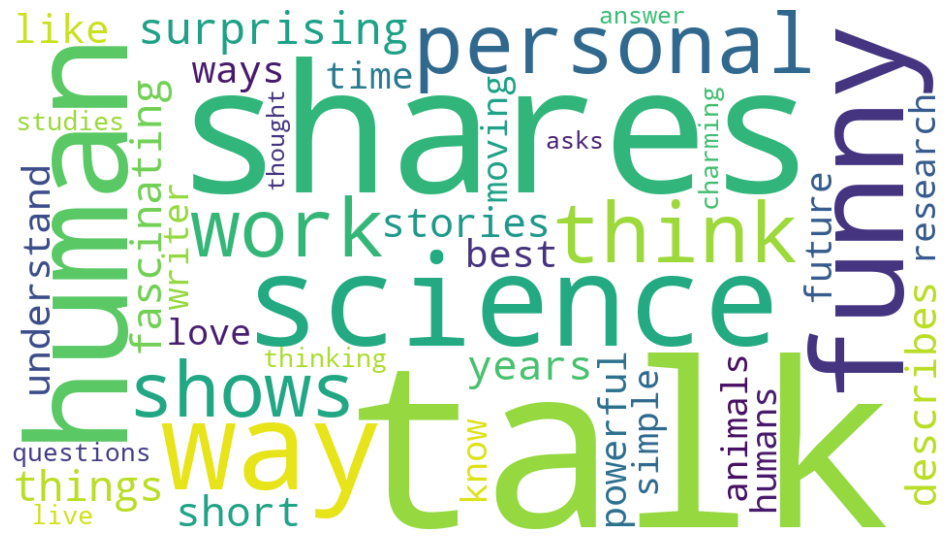

Topic 1:
story tells young moving family years powerful children school lives war personal living shocking stories tale father girls found game helped extraordinary save poet came college child love daughter kids afghanistan teacher remarkable doctor passion taught violence unlikely imagine mind


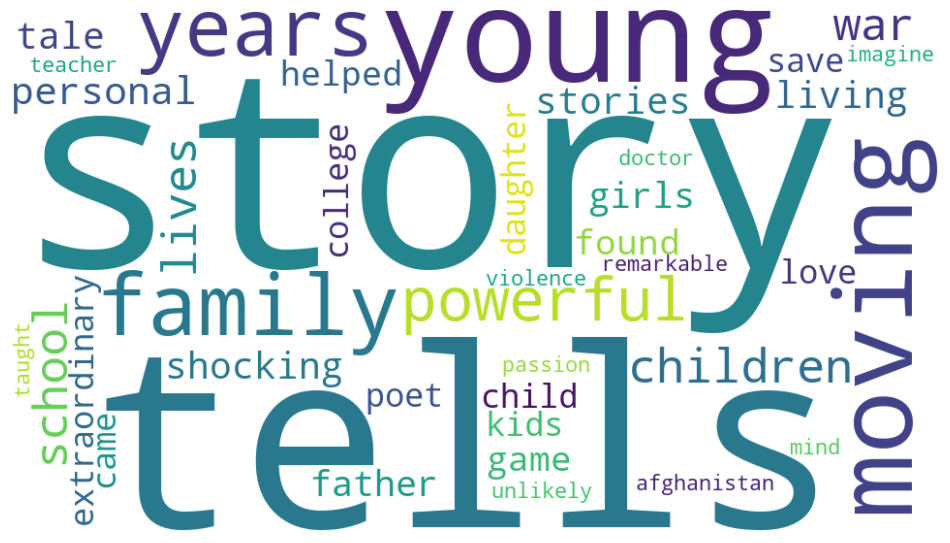

Topic 2:
world people says change global need climate help power problems lives use want food social cities billion asks big solve future poverty don start problem water crisis city better suggests internet country needs countries solution time political plan eye million


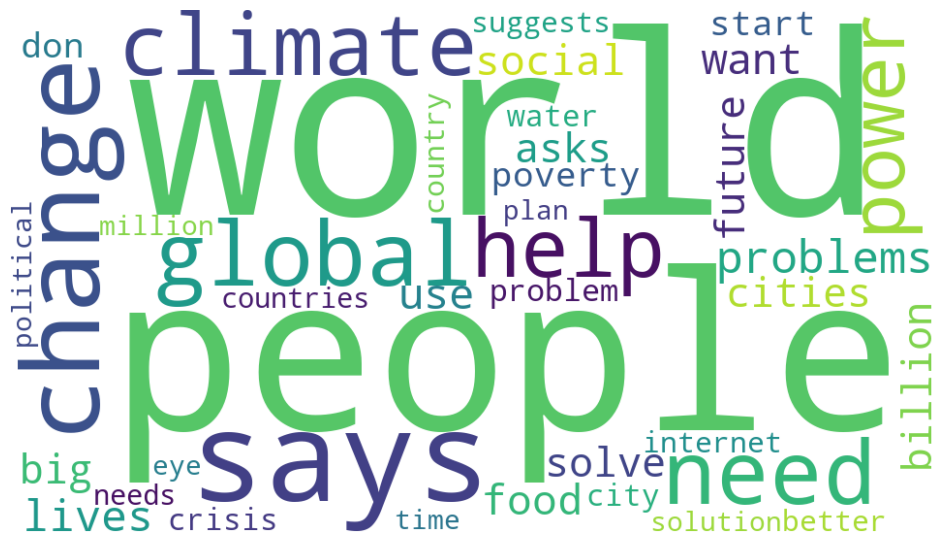

Topic 3:
ted fellow prize shows music anderson song stage chris singer video musical artist accepting talks performance wish plays curator create 2007 short audience play set songwriter inside images guitar thomas year featuring ocean power talk dance senior africa creatures sound


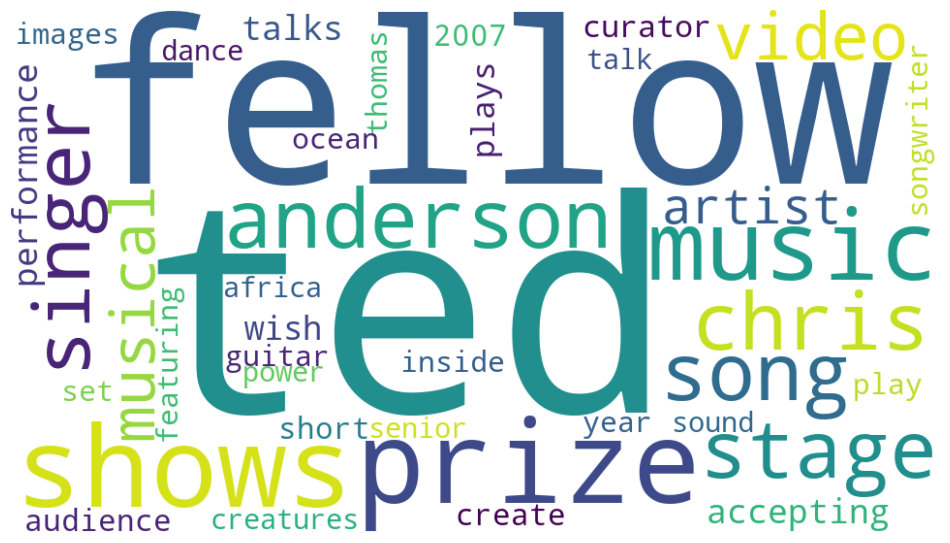

Topic 4:
new brain technology body ways help way york ideas shows look research cells cancer disease learn tech uses lab neuroscientist brains says light energy demos system demo like understanding time studies david neural researcher years grow big computer works understand


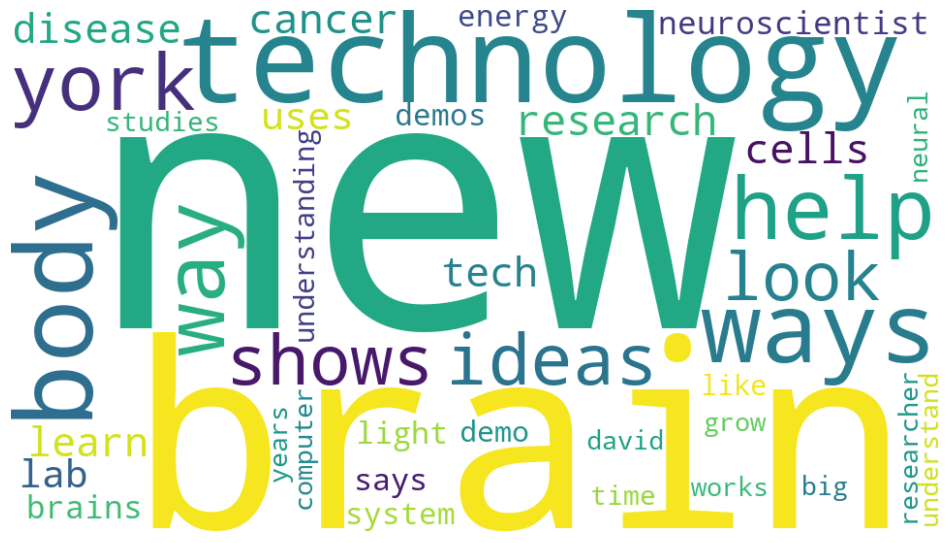

Topic 5:
design art designer work talks david explains studio school build modern products architect objects ted2012 inspired designs rockwell chee pearlman buildings john beautiful career curated guest architecture great session creative science shows museum technology process artist chair building curator nature


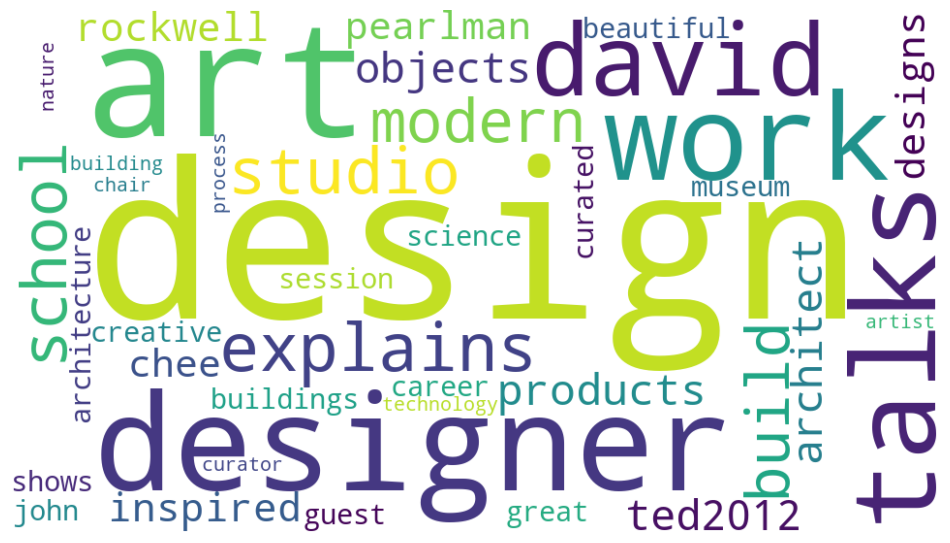

Topic 6:
life earth ocean like asks planet find look universe place mars happy death real years sea alien creatures days beautiful takes marine planetary moments david start search free images nature planets time questions director places living having space lost age


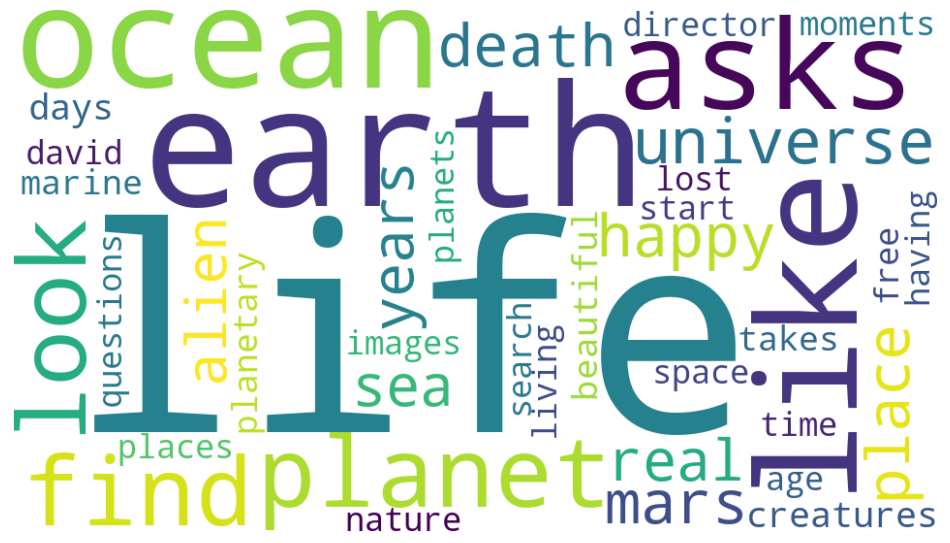

Topic 7:
data web know medical like information hans use way rosling real surprising health amounts look shows decisions online team results collecting right internet video numbers collected analysis called access car lee visualizations doctors system companies learn cars share big statistics


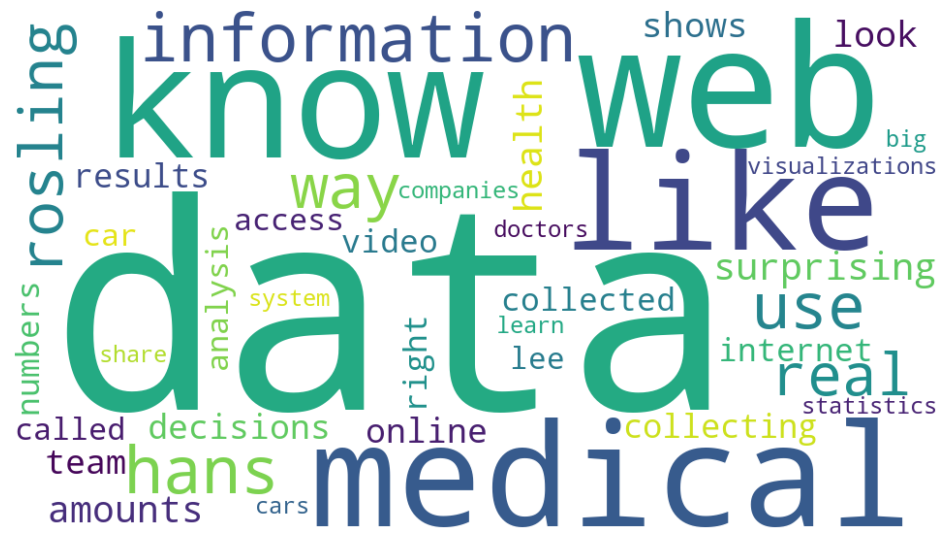

Topic 8:
women men stories media girls equal powerful advice social shares male news right health equality know issues war tell female sex sexual care talks change policy role don modern heart friends explores afghanistan political place mitchell ask medical public culture


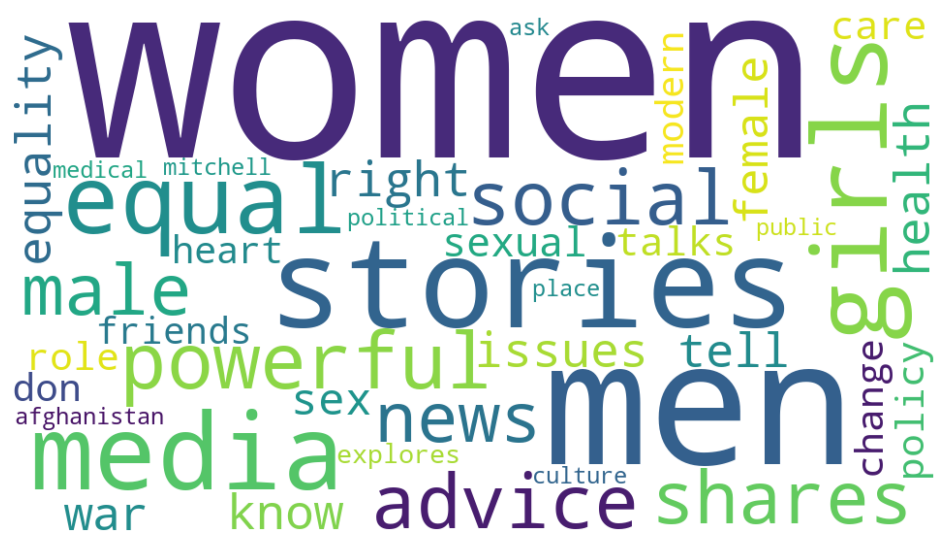

Topic 9:
makes case kids compelling says don health like care school feel education work better good learn thinking happy making argument happiness wrong students system embracing brains learning philosopher need success sharing talking schools issues public protecting ken bad choice society


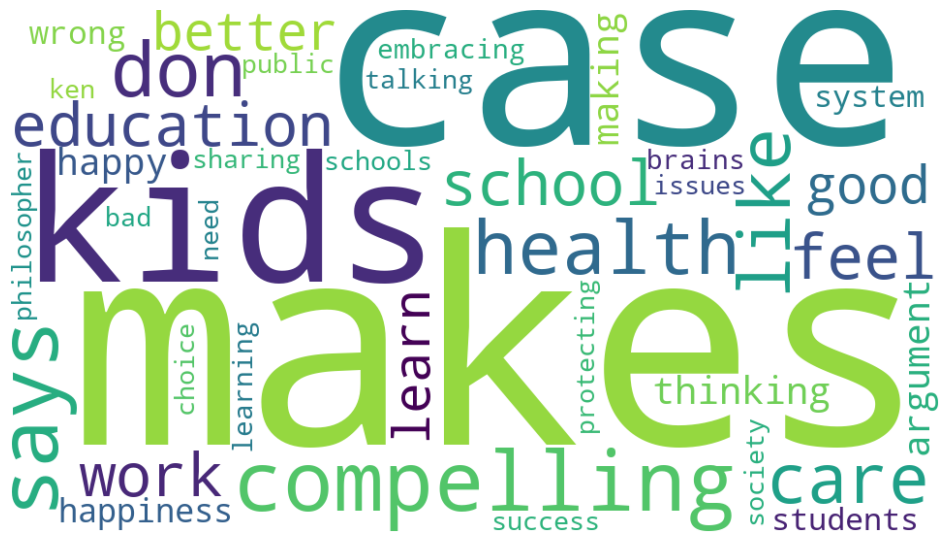

In [21]:
wordcloud_topics(nmf_para_model, count_para_vectorizer.get_feature_names_out())

## The LDA wordclouds

Topic 0:
talk life new like shares people says work ted shows world science find game human fellow images deep math beauty years stories found play artist create ocean experience pain real cancer started process funny journey art video better don learn


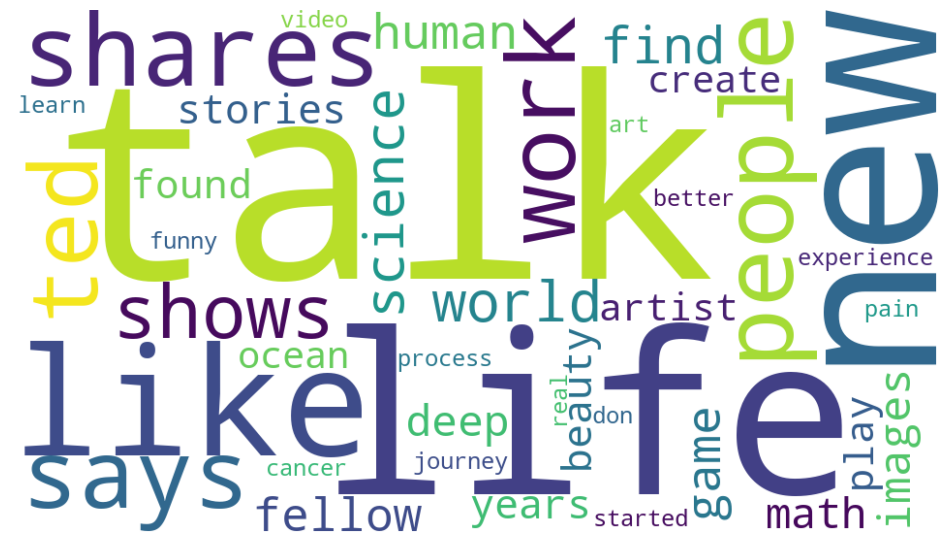

Topic 1:
talk people years tells story world new life shares way human change shows food stories found young lives climate love asks moving says self working ways create powerful power billion home explains funny community simple time long work build eye


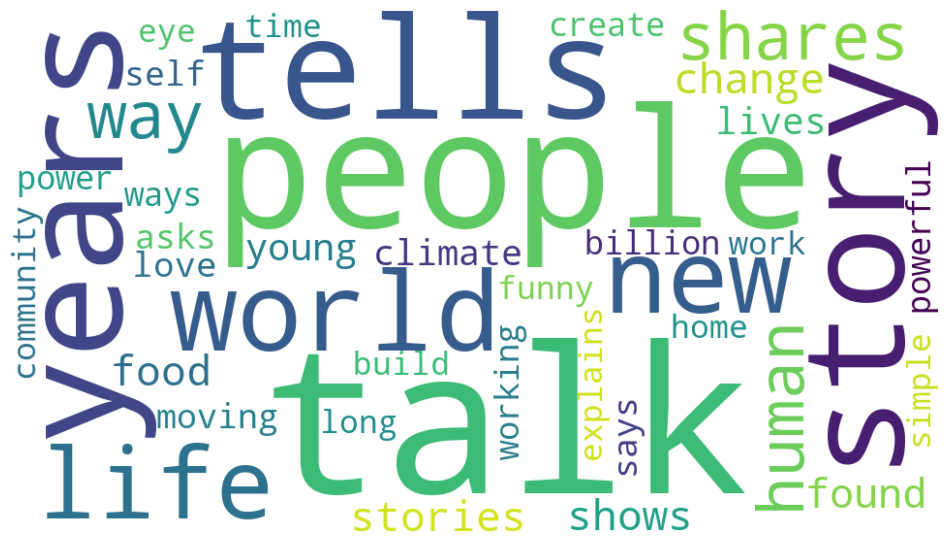

Topic 2:
talk new says life talks brain shares shows think help human surprising gives makes world work data future time car powerful ways asks things women know look prison like robots nature personal understand right learn history real humans author democracy


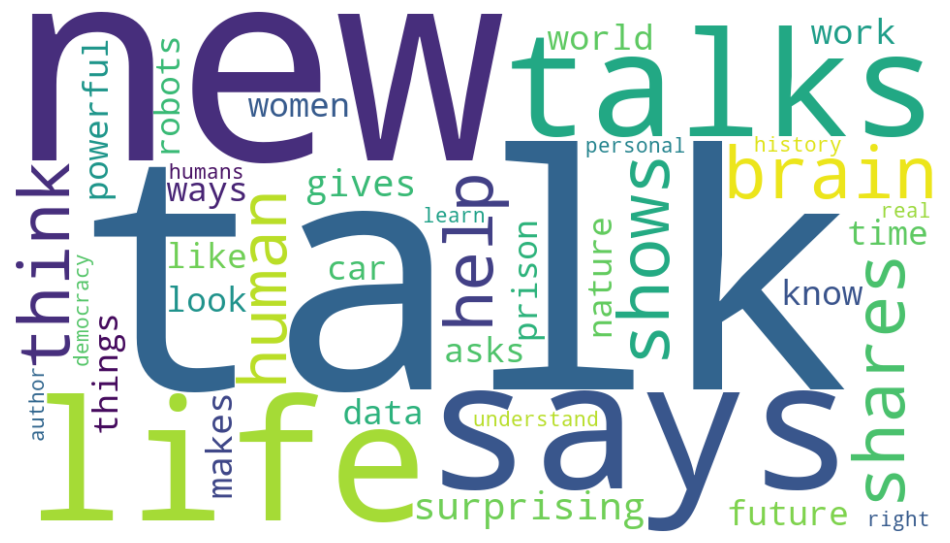

Topic 3:
talk data universe new life says world brain shows shares research light time like science day old people way change key year help earth based inside ocean talks years scientists found learn small design suggests climate cities video tiny given


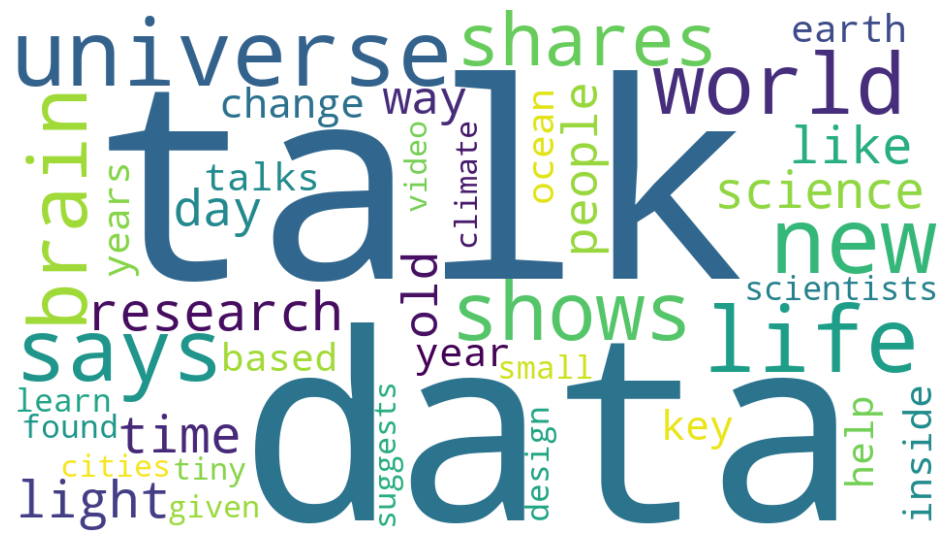

Topic 4:
world talk health ted medical people help new says care shows problems school work global need like shares war prize asks story water modern change lives explains data power working country suggests solve right fellow local human doctors tells million


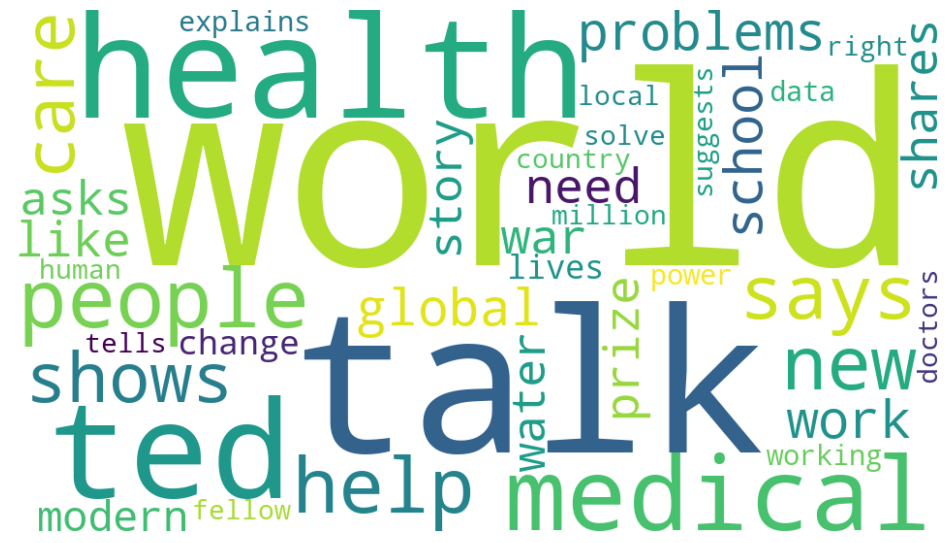

Topic 5:
talk world new human technology future shares art work story way time like brain shows know talks people ocean life real help surprising research says learn ted city artist onstage tells describes think song years lives fascinating powerful gives body


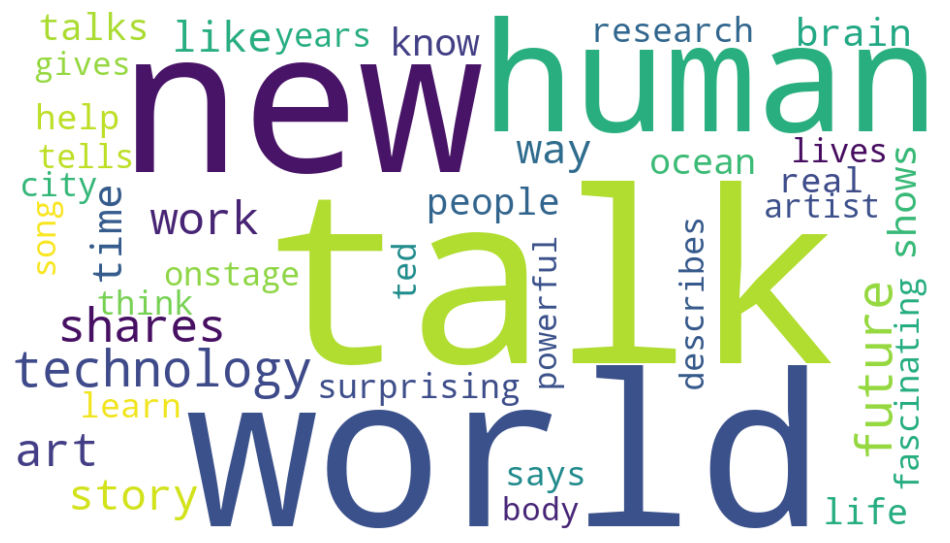

Topic 6:
says world talk shares design big new music like women change life time technology people story science offers today political history explores art live kids country ted work lives play social future plan david learned climate plays ideas united american


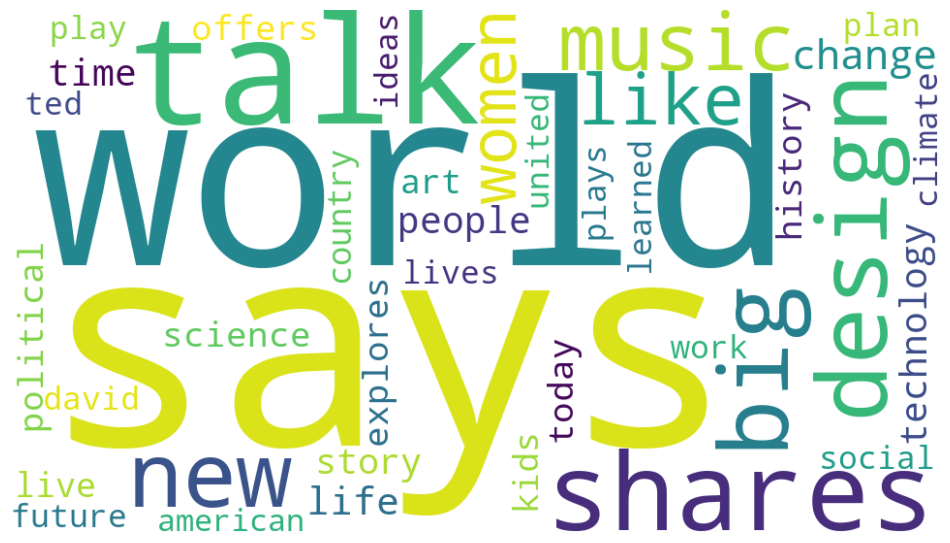

Topic 7:
ted life talk different new talks women play data shows problem love story fellow war nature simple powerful team says like years surprising stories calls need moving human went way growing including tells video explains question writer al plastic future


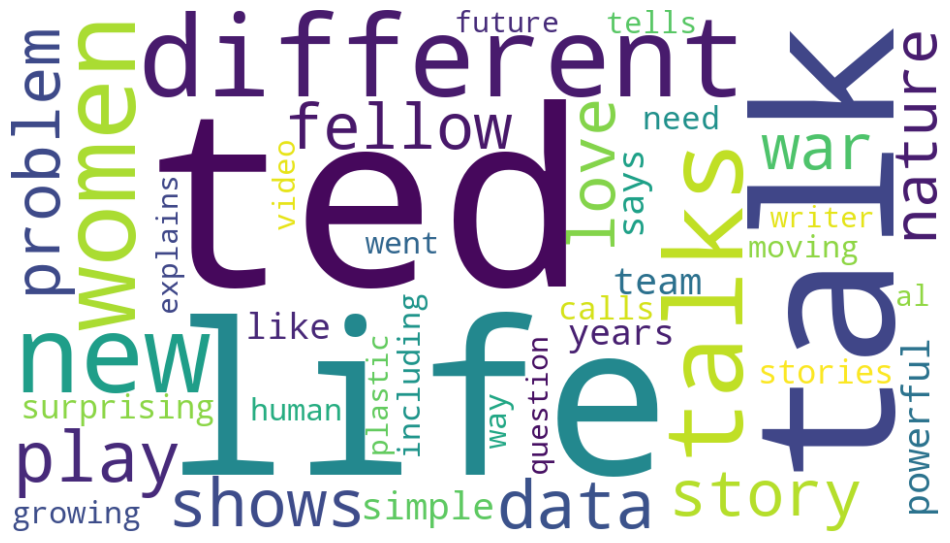

Topic 8:
says talk world people new ted makes like way help shares shows don look online need energy time case future life learn power open data internet good company kids fellow powerful global talks know idea want better explains create share


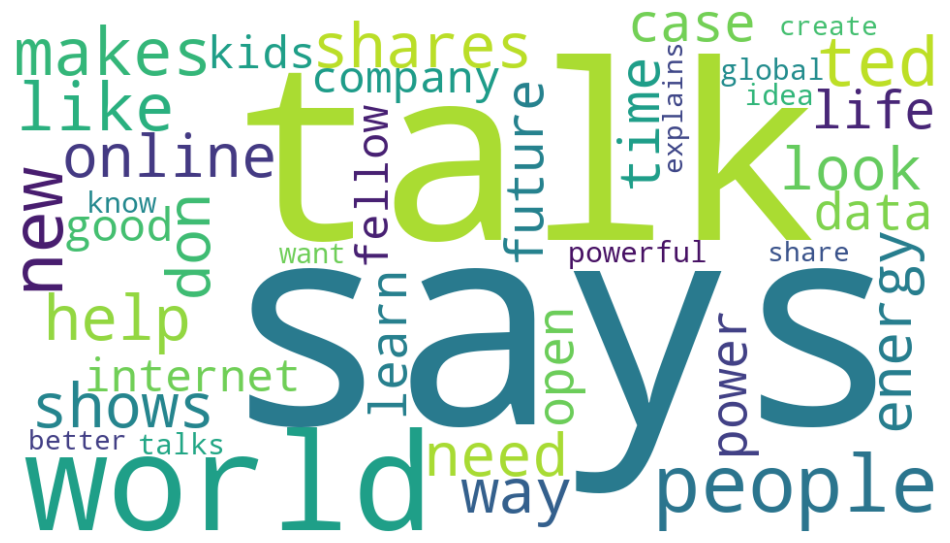

Topic 9:
talk way shares life new world human says shows like science asks makes people talks love charming design going work don think words space brain help humans know great explores use data growth years look economic art stories earth designed


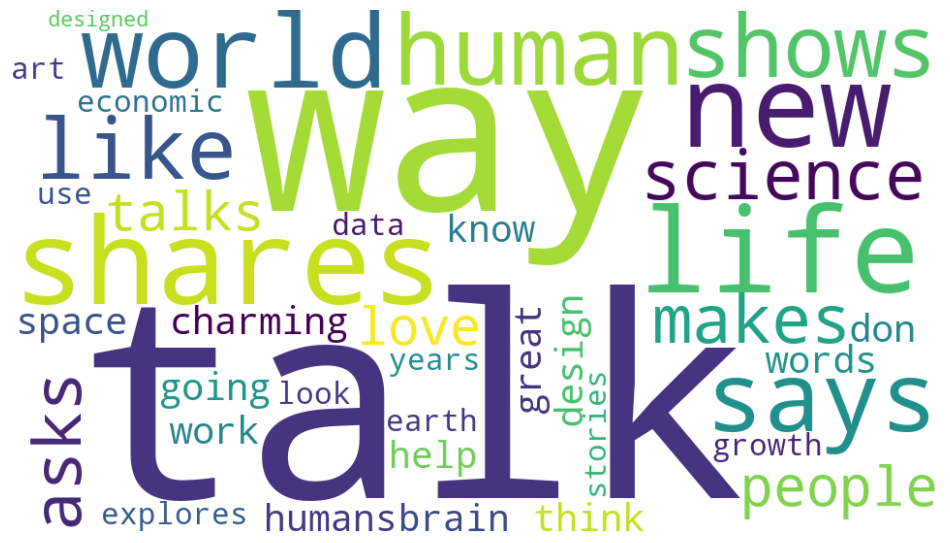

In [22]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

## Topics names by joining the top 2 words:

In [23]:
topic_names = []
voc = count_para_vectorizer.get_feature_names_out()

print("Vocabulary:", voc)

for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

print("Topic Names:", topic_names)


Vocabulary: ['000' '10' '100' ... 'yves' 'zero' 'zones']
Topic Names: ['Topic talk shares', 'Topic story tells', 'Topic world people', 'Topic ted fellow', 'Topic new brain', 'Topic design art', 'Topic life earth', 'Topic data web', 'Topic women men', 'Topic makes case']


## Separate data by year

In [24]:
from tqdm.auto import tqdm
import numpy as np

year_data = []

# Assuming paragraph_df is a DataFrame with a "year" column
for year in tqdm(np.unique(paragraph_df["year"])):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["year"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))



  0%|          | 0/12 [00:00<?, ?it/s]

## Draw year chart

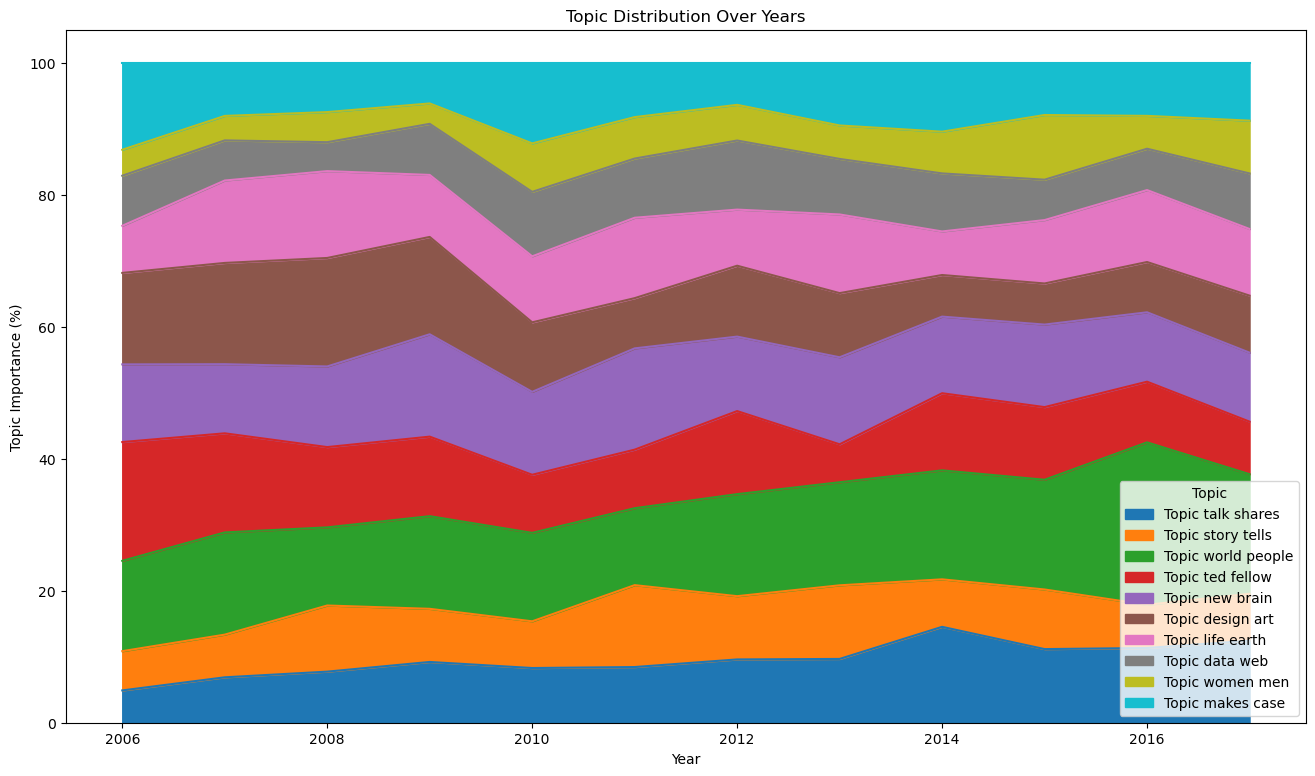

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming year_data is a list containing data for each year
# and topic_names is a list containing the names of topics

# Create DataFrame from year_data with appropriate column names
df_year = pd.DataFrame(year_data, columns=["year"] + topic_names)

# Set the "year" column as the index
df_year.set_index("year", inplace=True)

# Plotting
df_year.plot.area(figsize=(16, 9))
plt.xlabel("Year")
plt.ylabel("Topic Importance (%)")
plt.title("Topic Distribution Over Years")
plt.legend(title="Topic")
plt.show()
